<a href="https://colab.research.google.com/github/pavankalyan03/Fece_Verification/blob/main/FaceDetection_using_Triplet_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting Face

In [ ]:
import pandas as pd
import cv2
import numpy as np
import sklearn
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
!nvidia-smi

Sun Nov 26 14:20:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
def load_images_for_folder(folder, label, target_size = (300,300)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            image_path = os.path.join(folder, filename)
            image_rgb = cv2.imread(image_path)
            if image_rgb is not None:
                image_resized = cv2.resize(image_rgb, target_size)
                images.append(image_resized)
                labels.append(label)
    return images, labels

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
vis_path = "/content/drive/MyDrive/Oneshot/0"
var_path = "/content/drive/MyDrive/Oneshot/1"
adth_path = "/content/drive/MyDrive/Oneshot/2"
kapil_path = "/content/drive/MyDrive/Oneshot/3"
mynk_path = "/content/drive/MyDrive/Oneshot/4"
koti_path = "/content/drive/MyDrive/Oneshot/5"
diwkr_path = "/content/drive/MyDrive/Oneshot/6"
swmy_path = "/content/drive/MyDrive/Oneshot/7"
vmsi_path = "/content/drive/MyDrive/Oneshot/8"
palvi_path = "/content/drive/MyDrive/Oneshot/9"
srja_path = "/content/drive/MyDrive/Oneshot/10"

In [ ]:
vi,vi_l = load_images_for_folder(vis_path, 0)
var,var_l = load_images_for_folder(var_path, 1)
adth,adth_l = load_images_for_folder(adth_path, 2)
kapil,kapil_l = load_images_for_folder(kapil_path, 3)
mynk,mynk_l = load_images_for_folder(mynk_path, 4)
koti,koti_l = load_images_for_folder(koti_path, 5)
diwkr,diwkr_l = load_images_for_folder(diwkr_path, 6)
swmy,swmy_l = load_images_for_folder(swmy_path, 7)
vmsi,vmsi_l = load_images_for_folder(vmsi_path, 8)
palvi,palvi_l = load_images_for_folder(palvi_path, 9)
srja,srja_l = load_images_for_folder(srja_path, 10)

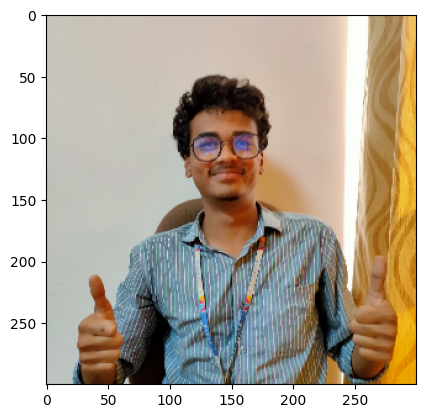

In [ ]:
plt.imshow(cv2.cvtColor(mynk[0], cv2.COLOR_BGR2RGB))

#Faec Recogintion Algorithm. using pre-trained resnet

In [ ]:
from PIL import Image
import numpy as np
import cv2
import os


prototxt_path = r'/content/drive/MyDrive/Face_detection_Algorithm/deploy.prototxt'
caffemodel_path = r'/content/drive/MyDrive/Face_detection_Algorithm/res10_300x300_ssd_iter_140000.caffemodel'
global net
net = cv2.dnn.readNetFromCaffe(prototxt_path, caffemodel_path)

def cropface(img,x,y,w,h):
    cropped_face = img[y-30:h+60, x-30:w+60]
    return cropped_face

def detectfaces(image):

    faces_identified = []
    # Resize the image to the required input size (300x300) and normalize it
    blob = cv2.dnn.blobFromImage(image, scalefactor=1.0, size=(300, 300), mean=(104, 177, 123))

    # Set the input to the network
    net.setInput(blob)

    detections = net.forward()

    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]

        if confidence > 0.6:
            box = detections[0, 0, i, 3:7] * np.array([image.shape[1], image.shape[0], image.shape[1], image.shape[0]])
            (x, y, x2, y2) = box.astype("int")
            cropped_face = cropface(image,x,y,x2,y2)
            # img_rgb = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB)
            faces_identified.append(cropped_face)

    return faces_identified


def detect_face(faces):

  extracted_faces = []
  for z in faces:
    detection = detectfaces(z)
    if len(detection) >= 1:
      for y in range(len(detection)):
        resized_image = cv2.resize(detection[y], (224,224))
        extracted_faces.append(resized_image)

  extracted_faces = np.array(extracted_faces)

  return extracted_faces




In [ ]:
vi = detect_face(vi)
var = detect_face(var)
adth = detect_face(adth)
kapil = detect_face(kapil)
mynk = detect_face(mynk)
koti = detect_face(koti)
diwkr = detect_face(diwkr)
swmy = detect_face(swmy)
vmsi = detect_face(vmsi)
palvi = detect_face(palvi)
srja = detect_face(srja)

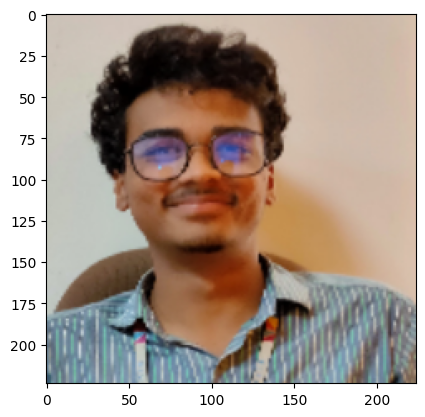

In [ ]:
plt.imshow(cv2.cvtColor(mynk[0], cv2.COLOR_BGR2RGB))

#Agumenting Data

In [ ]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode="nearest"
)

def agument_it(faces,label):

  faces = np.array(faces)

  agument_size = 10
  aug_images = []

  for image in faces:
    image = image.reshape((1,)+image.shape)
    i = 0
    for batch in datagen.flow(image,batch_size=1):
      aug_images.append(batch[0])
      i += 1
      if i >= agument_size:
        break

  aug_images = np.array(aug_images)

  labels = np.full((aug_images.shape[0],),label)

  return aug_images,labels

In [ ]:
vi,vi_l = agument_it(vi, 0)
var,var_l = agument_it(var, 1)
adth,adth_l = agument_it(adth, 2)
kapil,kapil_l = agument_it(kapil, 3)
mynk,mynk_l = agument_it(mynk, 4)
koti,koti_l = agument_it(koti, 5)
diwkr,diwkr_l = agument_it(diwkr, 6)
swmy,swmy_l = agument_it(swmy, 7)
vmsi,vmsi_l = agument_it(vmsi, 8)
palvi,palvi_l = agument_it(palvi, 9)
srja,srja_l = agument_it(srja, 10)

In [ ]:
vmsi.shape

(100, 224, 224, 3)

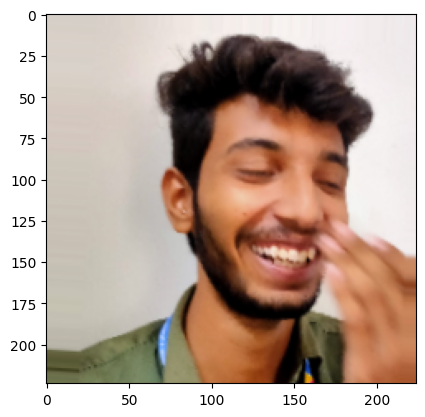

In [ ]:
plt.imshow(cv2.cvtColor(vmsi[40].astype('uint8'), cv2.COLOR_BGR2RGB))

In [ ]:
images = [vi, var , adth , kapil,  mynk,  koti, diwkr , swmy, vmsi , palvi , srja]
labels = [vi_l , var_l , adth_l , kapil_l , mynk_l , koti_l , diwkr_l , swmy_l , vmsi_l , palvi_l , srja_l]

In [ ]:
images = np.concatenate(images, axis=0)
labels = np.concatenate(labels, axis=0)

In [ ]:
images = images.reshape(images.shape[0],224,224,3)

In [ ]:
images.shape

(1400, 224, 224, 3)

# Importing Required Modules

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2
import tensorflow as tf
from pathlib import Path
from tensorflow.keras.regularizers import l2
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.optimizers import Adam,Nadam,RMSprop
from tensorflow.keras import metrics
from tensorflow.keras import Model
from tensorflow.keras.applications import resnet
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *

#Generating Triplets

In [ ]:
def generate_triplet_data(images, labels):
    # Generate index for each label
    unique_labels = np.unique(labels)
    label_wise_indices = {label: np.where(labels == label)[0] for label in unique_labels}

    # Generate triplets and labels
    triplets = []
    triplet_labels = []

    for index, anchor_label in enumerate(labels):
        positive_label = anchor_label
        negative_label = np.random.choice(unique_labels[unique_labels != anchor_label])

        # Select positive and negative images
        anchor_image = images[index]
        positive_indices = label_wise_indices[positive_label]
        negative_indices = label_wise_indices[negative_label]

        positive_image = images[np.random.choice(positive_indices)]
        negative_image = images[np.random.choice(negative_indices)]

        triplets.append((anchor_image, positive_image, negative_image))
        triplet_labels.append(0)  # Triplet loss does not require explicit positive/negative labels

    return np.array(triplets), np.array(triplet_labels)

#Generate Triplets

In [ ]:
triplets, triplet_labels = generate_triplet_data(images, labels)
triplets, triplet_labels = shuffle(triplets, triplet_labels)

In [ ]:
triplet_labels = np.zeros(images.shape[0])

In [ ]:
triplets.shape

(1400, 3, 224, 224, 3)

In [ ]:
triplet_labels.shape

(1400,)

#Visulaizing Triplets

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_triplet_data(triplets, triplet_labels, num_samples=5):
    # Select random samples
    sample_indices = np.random.choice(len(triplets), num_samples, replace=False)

    for i, index in enumerate(sample_indices):
        anchor, positive, negative = triplets[index]
        label = triplet_labels[index]

        fig, axarr = plt.subplots(1, 3, figsize=(10, 4))

        axarr[0].imshow(cv2.cvtColor(anchor.astype('uint8'), cv2.COLOR_BGR2RGB))
        axarr[0].axis('off')
        axarr[0].set_title('Anchor')

        axarr[1].imshow(cv2.cvtColor(positive.astype('uint8'), cv2.COLOR_BGR2RGB))
        axarr[1].axis('off')
        axarr[1].set_title('Positive')

        axarr[2].imshow(cv2.cvtColor(negative.astype('uint8'), cv2.COLOR_BGR2RGB))
        axarr[2].axis('off')
        axarr[2].set_title('Negative')

        plt.suptitle(f'Triplet {i+1} - Label: {label}')
        plt.show()

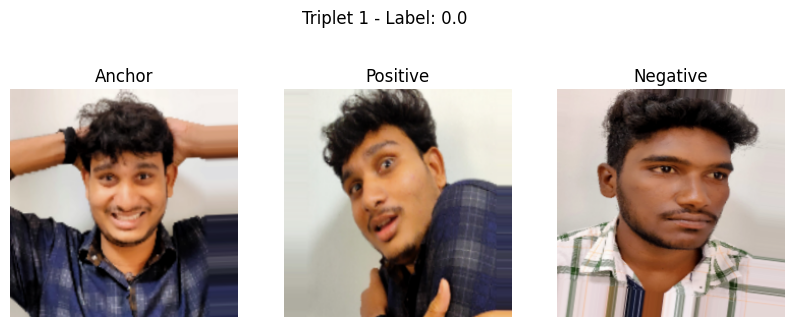

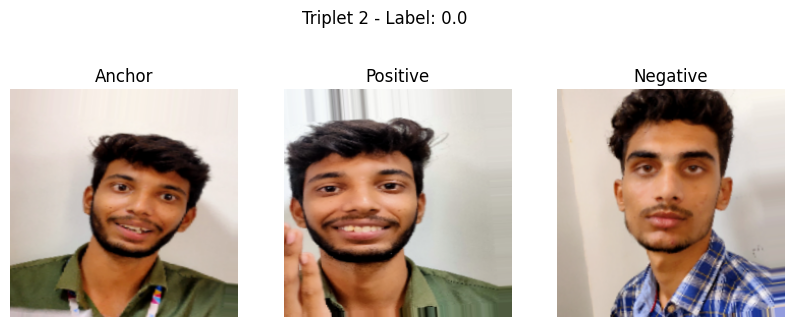

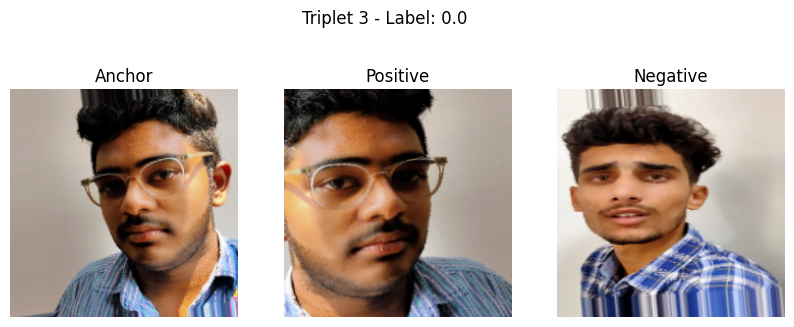

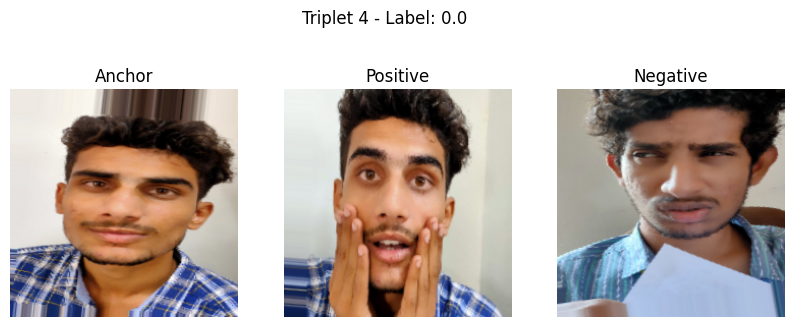

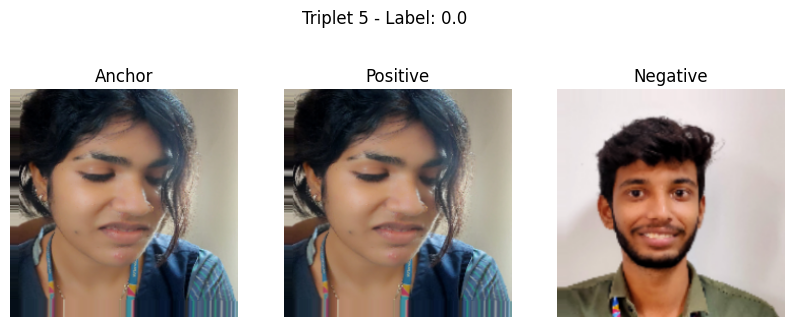

In [ ]:
visualize_triplet_data(triplets, triplet_labels)

# Loss Functions And Distance Layers And Metrics

In [ ]:
import tensorflow.keras.backend as K

def triplet_loss(y_true, y_pred, alpha = 0.2 ):
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]

    # Euclidean distances
    pos_dist = K.sum(K.square(anchor - positive), axis=-1)
    neg_dist = K.sum(K.square(anchor - negative), axis=-1)

    # Compute triplet loss
    basic_loss = pos_dist - neg_dist + alpha
    loss = K.maximum(basic_loss, 0.0)

    return loss

In [ ]:
def cosine_similarity(y_true, y_pred):
    anchor, positive, negative = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2]

    dot_product_positive = K.sum(anchor * positive, axis=-1)
    norm_anchor_positive = K.sqrt(K.sum(K.square(anchor), axis=-1) * K.sum(K.square(positive), axis=-1))
    positive_similarity = dot_product_positive / norm_anchor_positive

    dot_product_negative = K.sum(anchor * negative, axis=-1)
    norm_anchor_negative = K.sqrt(K.sum(K.square(anchor), axis=-1) * K.sum(K.square(negative), axis=-1))
    negative_similarity = dot_product_negative / norm_anchor_negative

    # return the mean cosine similarity
    return K.mean(positive_similarity - negative_similarity)

# Model 1

In [ ]:
# input_tensor = Input(shape=(224, 224, 3))

# conv1 = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(input_tensor)
# conv2 = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(conv1)
# max_pool1 = MaxPooling2D(2, 2)(conv2)
# batch_norm1 = BatchNormalization()(max_pool1)

# conv3 = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(batch_norm1)
# conv4 = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same', kernel_regularizer=l2(0.01))(conv3)
# max_pool2 = MaxPooling2D(2, 2)(conv4)
# batch_norm2 = BatchNormalization()(max_pool2)

# conv6 = Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(batch_norm2)
# max_pool3 = MaxPooling2D(2, 2)(conv6)
# batch_norm3 = BatchNormalization()(max_pool3)

# conv7 = Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(batch_norm3)
# batch_norm4 = BatchNormalization()(conv7)

# # Flatten layer
# flatten = Flatten()(batch_norm4)

# # Dense layers
# dense1 = Dense(196, activation = 'relu')(flatten)
# droupout = Dropout(0.5)(dense1)
# dense2 = Dense(128, activation = 'relu')(droupout)
# l2 = layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1)) (dense1) # L2 normalize embeddings

# embedding = Model(input_tensor, dense2, name = "Embedding")
# embedding.summary()

In [ ]:
# input_shape = (224,224,3)
# anchor_input = Input(input_shape, name='anchor_input')
# positive_input = Input(input_shape, name='positive_input')
# negative_input = Input(input_shape, name='negative_input')


# outputs = Concatenate()([embedding(anchor_input),embedding(positive_input),embedding(negative_input)])

# siamse_model = Model(
#     inputs = [anchor_input, positive_input, negative_input],
#     outputs = outputs
# )


In [ ]:
# siamse_model.summary()

In [ ]:
# siamse_model.compile(optimizer = RMSprop(learning_rate=0.001, rho=0.9), loss = triplet_loss, metrics=["accuracy"])

In [ ]:
# from tensorflow.keras.callbacks import ModelCheckpoint
# #
# checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

In [ ]:
# tf.config.run_functions_eagerly(True)

In [ ]:
# siamse_model.fit([triplets[:,0],triplets[:,1],triplets[:,2]],triplet_labels,
#                  epochs = 20,
#                  validation_split = 0.2,
#                  batch_size = 32)

#Loading My Model

In [ ]:
# from tensorflow.keras.models import load_model

# # Load the best model
# best_model = load_model('best_model.h5')

In [ ]:
# loss = best_model.evaluate(x_test, y_test)
# print(f'Loss on test set: {loss}')

#Another Try With Inception Type of Network

In [ ]:
import keras
import tensorflow.keras.backend as K

def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):

    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)

    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)

    return output

kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

input_layer = Input(shape=(224, 224, 3))

x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')


x1 = AveragePooling2D((5, 5), strides=3)(x)
x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
x1 = Flatten()(x1)
x1 = Dense(1024, activation='relu')(x1)
x1 = Dropout(0.7)(x1)
x1 = Dense(128, activation='relu', name='output_a')(x1)

x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=256,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4c')

x = inception_module(x,
                     filters_1x1=112,
                     filters_3x3_reduce=144,
                     filters_3x3=288,
                     filters_5x5_reduce=32,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4d')


x2 = AveragePooling2D((5, 5), strides=3)(x)
x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)
x2 = Flatten()(x2)
x2 = Dense(1024, activation='relu')(x2)
x2 = Dropout(0.7)(x2)
x2 = Dense(128, activation='relu', name='output_b')(x2)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_4e')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5a')

x = inception_module(x,
                     filters_1x1=384,
                     filters_3x3_reduce=192,
                     filters_3x3=384,
                     filters_5x5_reduce=48,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5b')

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu', name='real_output')(x)
conc = concatenate([x, x1, x2], axis=-1, name='concatenated_output')
conc = Lambda(lambda x:K.l2_normalize(x,axis=1),name='lambda_1')(conc)

In [ ]:
model = Model(input_layer, conc, name='Inception_by_pk')

In [ ]:
model.summary()

Model: "Inception_by_pk"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv_1_7x7/2 (Conv2D)       (None, 112, 112, 64)         9472      ['input_2[0][0]']             
                                                                                                  
 max_pool_1_3x3/2 (MaxPooli  (None, 56, 56, 64)           0         ['conv_1_7x7/2[0][0]']        
 ng2D)                                                                                            
                                                                                                  
 conv_2a_3x3/1 (Conv2D)      (None, 56, 56, 64)           4160      ['max_pool_1_3x3

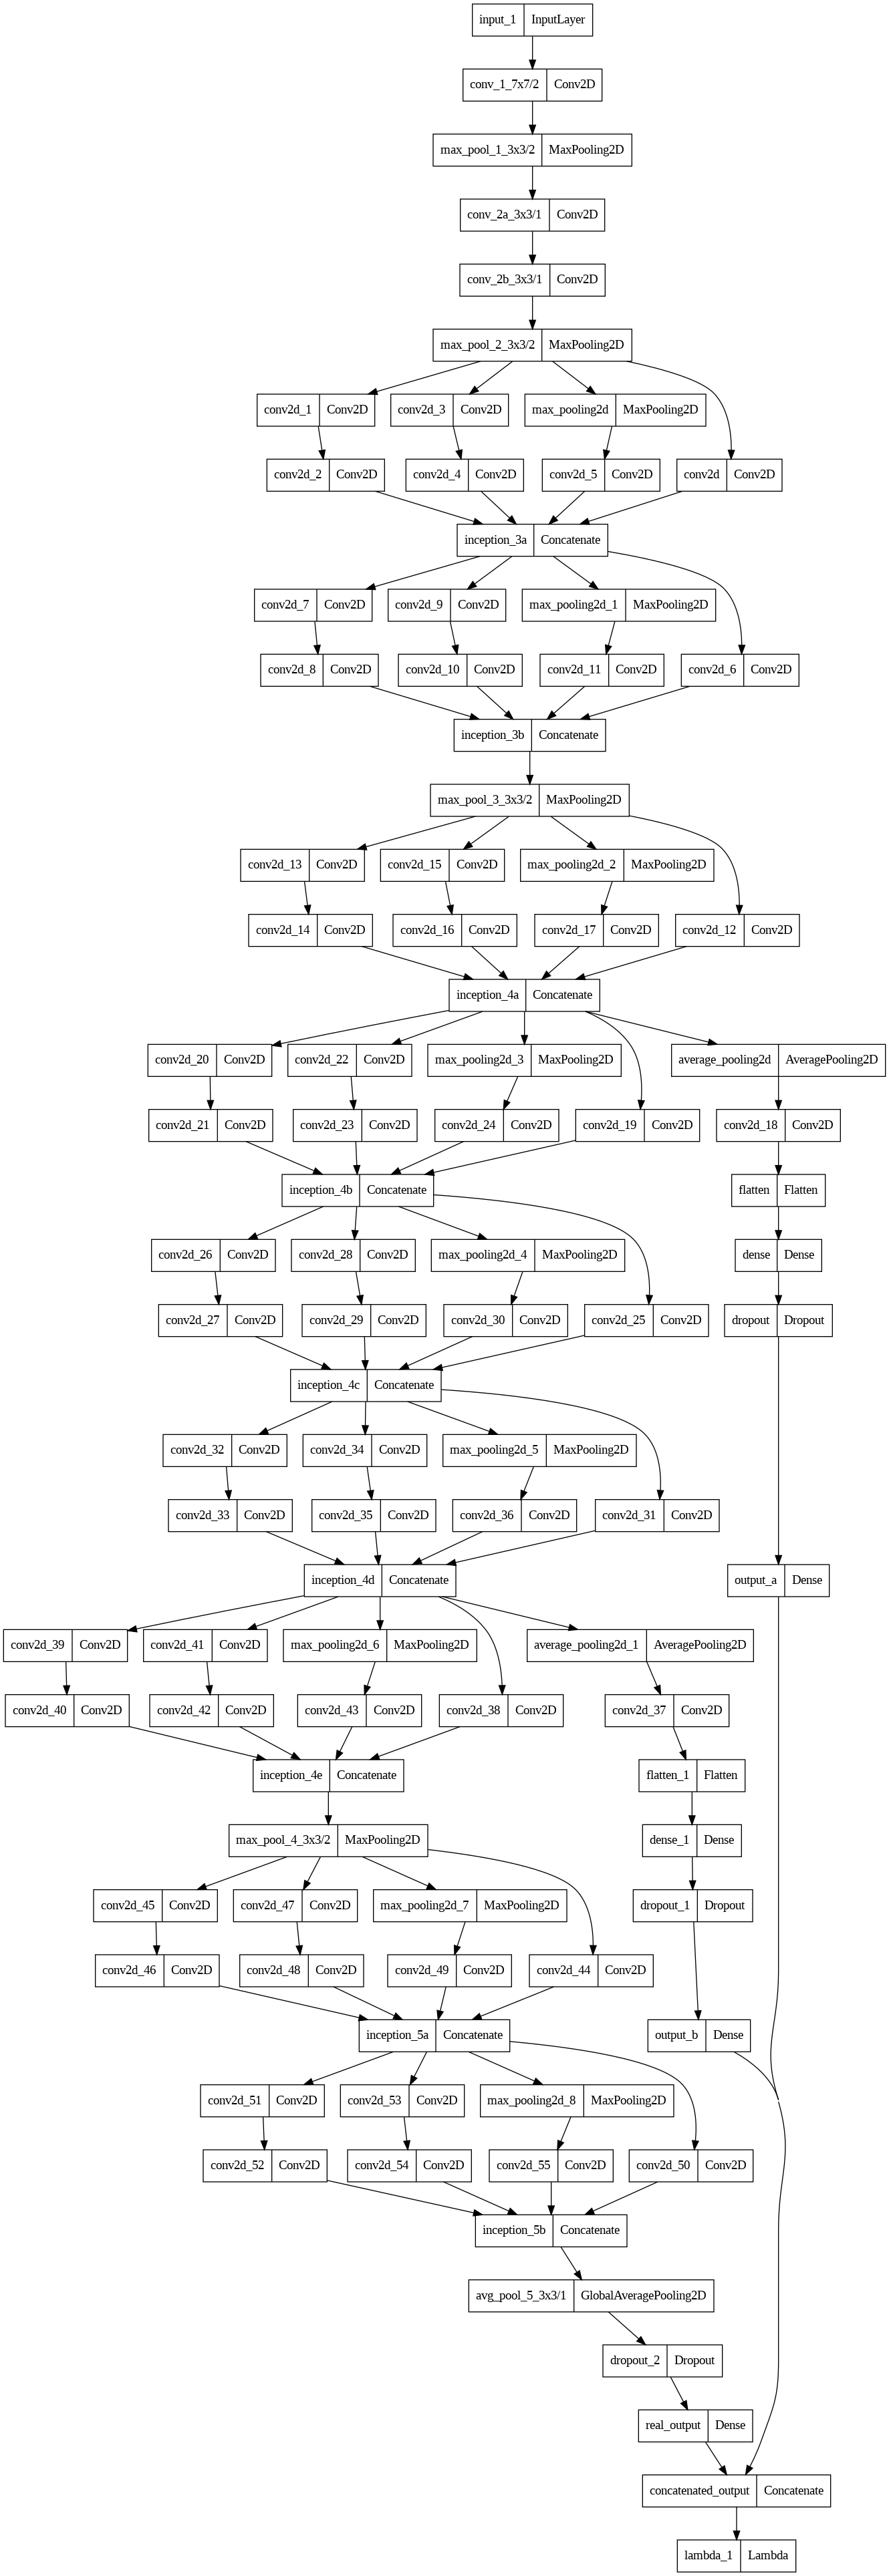

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
# input_shape = (224,224,3)
# anchor_input = Input(input_shape, name='anchor_input')
# positive_input = Input(input_shape, name='positive_input')
# negative_input = Input(input_shape, name='negative_input')


# outputs = Concatenate()([model(anchor_input),model(positive_input),model(negative_input)])
# outputs = Dense(128)(outputs)

# siamse_model_i = Model(
#     inputs = [anchor_input, positive_input, negative_input],
#     outputs = outputs
# )


In [ ]:
# from keras.utils import plot_model
# plot_model(siamse_model_i)

In [ ]:
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
import math

initial_lrate = 0.01

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(learning_rate=initial_lrate, momentum=0.9, nesterov=False)
rms = RMSprop(learning_rate = initial_lrate, rho=0.9)

lr_sc = LearningRateScheduler(decay, verbose=1)

In [ ]:
# siamse_model_i.compile(optimizer = sgd, loss = triplet_loss)

In [ ]:
# siamse_model_i.compile(optimizer = rms, loss = triplet_loss, metrics = [cosine_similarity])

In [ ]:
# history = siamse_model_i.fit([triplets[:,0],triplets[:,1],triplets[:,2]],
#                               triplet_labels,
#                               epochs = 30,
#                               validation_split = 0.2,
#                               callbacks=[lr_sc],
#                               batch_size = 16)

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.plot(history.history["cosine_similarity"])
plt.plot(history.history["val_cosine_similarity"])
plt.legend(["Loss", "Validation Loss","cosine_similarity","val_cosine_similarity"])

#Including Distance Layer Instead of cosine

In [ ]:
class DistanceLayer(layers.Layer):
    """
    This layer is responsible for computing the distance between the anchor
    embedding and the positive embedding, and the anchor embedding and the
    negative embedding.
    """

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, anchor, positive, negative):
        ap_distance = tf.reduce_sum(tf.square(anchor - positive), -1)
        an_distance = tf.reduce_sum(tf.square(anchor - negative), -1)
        return (ap_distance, an_distance)

target_shape = (224,224,3)
anchor_input = layers.Input(name="anchor", shape=target_shape + (1,))
positive_input = layers.Input(name="positive", shape=target_shape + (1,))
negative_input = layers.Input(name="negative", shape=target_shape + (1,))

distances = DistanceLayer()(
    model(anchor_input),
    model(positive_input),
    model(negative_input),
)

siamese_network_i2 = Model(
    inputs=[anchor_input, positive_input, negative_input], outputs=distances
)

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
# rms = RMSprop(learning_rate = 0.01, rho=0.9)
# siamese_network_i2.compile(optimizer = rms, loss = triplet_loss, metrics = [cosine_similarity])

In [ ]:
# history = siamese_network_i2.fit([triplets[:,0],triplets[:,1],triplets[:,2]],
#                               triplet_labels,
#                               epochs = 5,
#                               validation_split = 0.2,
#                               batch_size = 16)

In [ ]:
class SiameseModel(Model):
    """The Siamese Network model with a custom training and testing loops.

    Computes the triplet loss using the three embeddings produced by the
    Siamese Network.

    The triplet loss is defined as:
       L(A, P, N) = max(‖f(A) - f(P)‖² - ‖f(A) - f(N)‖² + margin, 0)
    """

    def __init__(self, siamese_network, margin=0.5):
        super().__init__()
        self.siamese_network = siamese_network
        self.margin = margin
        self.loss_tracker = metrics.Mean(name="loss")

    def call(self, inputs):
        return self.siamese_network(inputs)

    def train_step(self, data):
        # GradientTape is a context manager that records every operation that
        # you do inside. We are using it here to compute the loss so we can get
        # the gradients and apply them using the optimizer specified in
        # `compile()`.
        with tf.GradientTape() as tape:
            loss = self._compute_loss(data)

        # Storing the gradients of the loss function with respect to the
        # weights/parameters.
        gradients = tape.gradient(loss, self.siamese_network.trainable_weights)

        # Applying the gradients on the model using the specified optimizer
        self.optimizer.apply_gradients(
            zip(gradients, self.siamese_network.trainable_weights)
        )

        # Let's update and return the training loss metric.
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def test_step(self, data):
        loss = self._compute_loss(data)

        # Let's update and return the loss metric.
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def _compute_loss(self, data):
        # The output of the network is a tuple containing the distances
        # between the anchor and the positive example, and the anchor and
        # the negative example.
        ap_distance, an_distance = self.siamese_network(data)

        # Computing the Triplet Loss by subtracting both distances and
        # making sure we don't get a negative value.
        loss = ap_distance - an_distance
        loss = tf.maximum(loss + self.margin, 0.0)
        return loss

    @property
    def metrics(self):
        # We need to list our metrics here so the `reset_states()` can be
        # called automatically.
        return [self.loss_tracker]

In [ ]:
siamese_model_i2 = SiameseModel(siamese_network_i2)
siamese_model_i2.compile(optimizer = Adam(0.0001))

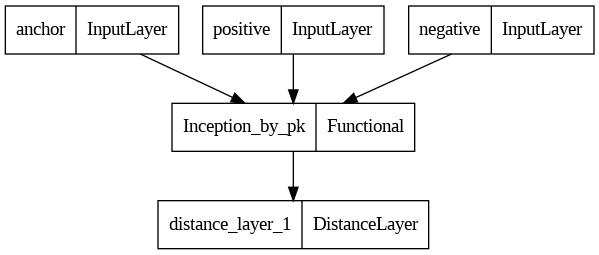

In [ ]:
from keras.utils import plot_model
plot_model(siamese_network_i2)

In [ ]:
history = siamese_model_i2.fit([triplets[:,0],triplets[:,1],triplets[:,2]], epochs=5, validation_split = 0.2)

Epoch 1/5
35/35 [==============================] - 66s 586ms/step - loss: 0.2864 - val_loss: 0.2325
Epoch 2/5
35/35 [==============================] - 12s 352ms/step - loss: 0.1684 - val_loss: 0.1623
Epoch 3/5
35/35 [==============================] - 12s 350ms/step - loss: 0.1157 - val_loss: 0.1097
Epoch 4/5
35/35 [==============================] - 176s 5s/step - loss: 0.0845 - val_loss: 0.1014
Epoch 5/5
35/35 [==============================] - 12s 349ms/step - loss: 0.0645 - val_loss: 0.1121


#Testing the Model

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def face_verification(embedding_model, face1, face2, threshold=0.7):
    # Get embeddings for the faces
    embedding1 = embedding_model.layers[3].predict(np.expand_dims(face1, axis=0))[0]
    embedding2 = embedding_model.layers[3].predict(np.expand_dims(face2, axis=0))[0]

    # distance = np.linalg.norm(embedding1 - embedding2)  # Euclidean distance

    distance = np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))

    # return distance
    if distance > threshold:
        return True
    else:
        return False

In [ ]:
plt.imshow(cv2.cvtColor(images[0].astype('uint8'), cv2.COLOR_BGR2RGB))

In [ ]:
face1 = images[0]
face2 = images[150]

result = face_verification(siamese_network_i2, face1, face2)

print(result)

if result:
    print("The faces are the same person.")
else:
    print("The faces are different people.")

In [ ]:
cosine_similariti = metrics.CosineSimilarity()

positive_similarity = cosine_similariti(anchor_embedding, positive_embedding)
print("Positive similarity:", positive_similarity.numpy())

negative_similarity = cosine_similariti(anchor_embedding, negative_embedding)
print("Negative similarity", negative_similarity.numpy())

dj = cosine_similariti(positive_embedding, negative_embedding)
print("Negative similarity", dj.numpy())